Cluster customers based on spending habits and propose marketing strategies tailored to each
segment.

In [ ]:
# IMPORT LIBRARIES 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [ ]:
# IMPORT DATASET 
df = pd.read_csv(r"C:\Users\SR Laptop\Desktop\Task-2\Mall_Customers.csv")
print(df.head())
print(df.info())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [ ]:
# EXPLORATORY DATA ANALYSIS
print(df.describe()) #Basic statistics




       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


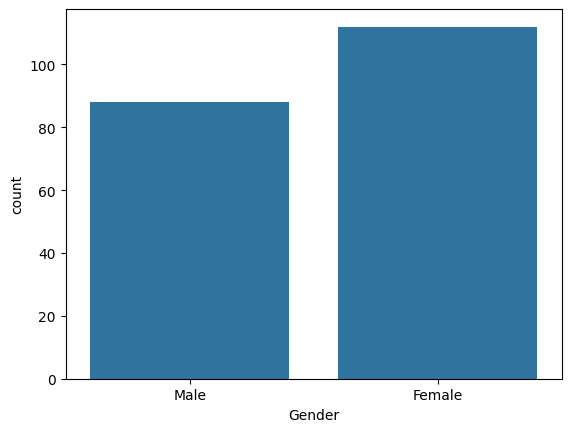

In [ ]:
# EXPLORATORY DATA ANALYSIS
sns.countplot(x="Gender", data=df) #Gender distribution
plt.show()

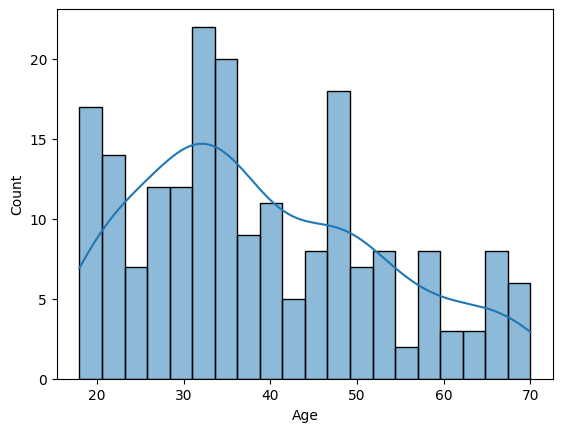

In [ ]:
# EXPLORATORY DATA ANALYSIS
sns.histplot(df["Age"], bins=20, kde=True) # Age distribution
plt.show()

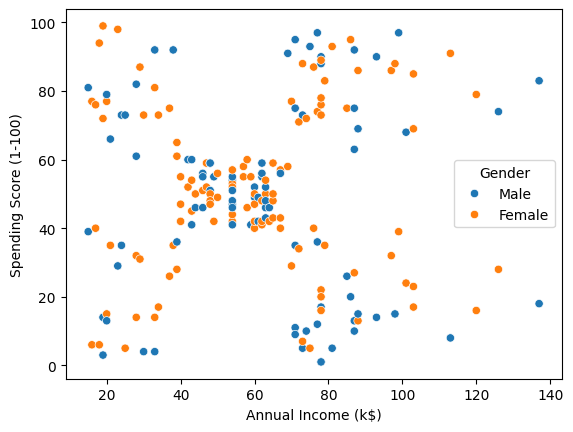

In [ ]:
# EXPLORATORY DATA ANALYSIS
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df, hue="Gender") # Annual Income vs Spending Score
plt.show()

In [ ]:
# DATA PREPROCESSING
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

scaler = StandardScaler() # Scale features for better clustering
X_scaled = scaler.fit_transform(X)


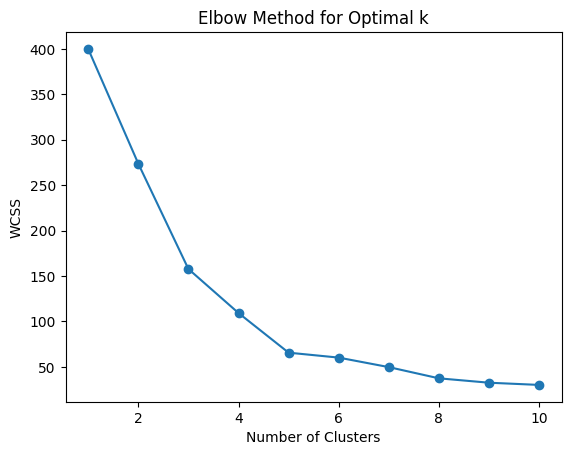

In [ ]:
# OPTIMAL CLUSTERS(ELBOW METHOD)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()


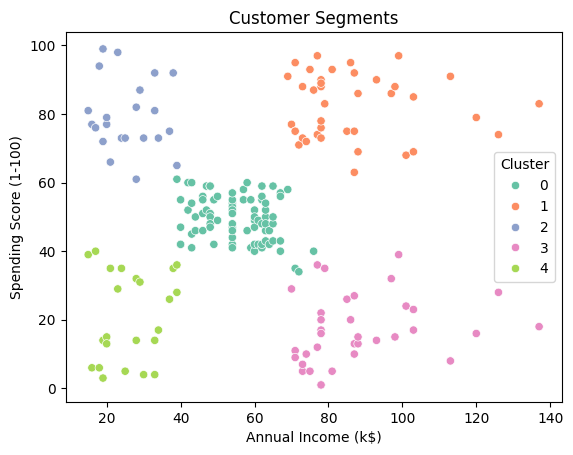

In [ ]:
# K-MEAN CLUSTERING
kmeans = KMeans(n_clusters=5, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", 
                hue="Cluster", palette="Set2", data=df)
plt.title("Customer Segments")
plt.show()


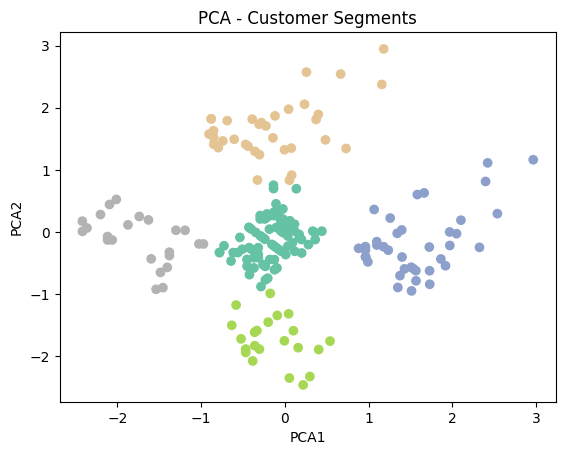

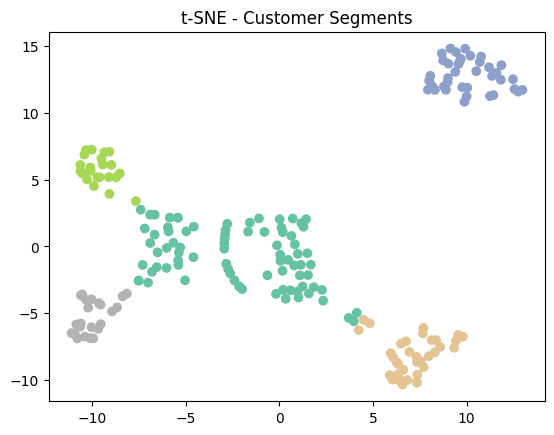

In [ ]:
# DIMENSIONALITY REDUCTION(PCA/T-SNE)
pca = PCA(n_components=2) # PCA for visualization
pca_components = pca.fit_transform(X_scaled)

plt.scatter(pca_components[:,0], pca_components[:,1], c=df["Cluster"], cmap="Set2")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("PCA - Customer Segments")
plt.show()

tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000) # t-SNE (optional, better separation)
tsne_components = tsne.fit_transform(X_scaled)

plt.scatter(tsne_components[:,0], tsne_components[:,1], c=df["Cluster"], cmap="Set2")
plt.title("t-SNE - Customer Segments")
plt.show()
